# Life Expectancy and GDP

This project's aim is to explore the relation between GDP and life expectancy at birth. We are going to analyze data from the WHO and the World Bank for six countries in the 2000-2015 period to find out whether the GDP of a country is linked to the life expectancy of its citizens.

## Loading the data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The data are stored in a table with 4 columns: Country, Year, Life expectancy at birth(years), and GDP.

In [29]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


Let's take a look at some summary statistics of our data table. We have 96 entries, with dates ranging from 2000 to 2015. Both of the life expectancy at birth and GDP vary greatly from entry to entry, as shown by the relatively high standard deviation in both cases. Let's dig deeper to find out which countries we will examine.

In [30]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The 6 countries we will study are Chile, China, Germany, Mexico, the United States of America and Zimbabwe.

## Data Visualization & Analysis

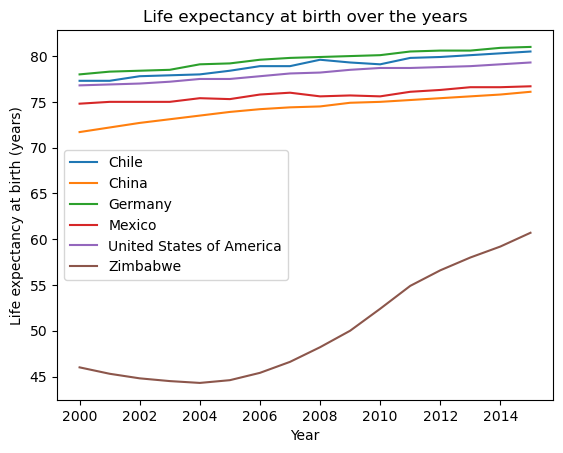

<Figure size 640x480 with 0 Axes>

In [31]:
for i in range(len(df.Country.unique())):
    plt.plot('Year', 'Life expectancy at birth (years)', data=df[df.Country==df.Country.unique()[i]])
    plt.title('Life expectancy at birth over the years')
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[2])
    plt.legend(df.Country.unique(),)
plt.show()    
plt.clf()

In [56]:
life_expectancy_means = [df['Life expectancy at birth (years)'][df.Country == country].mean() for country in df.Country.unique()]
print(life_expectancy_means)
for country, i in zip(df.Country.unique(), life_expectancy_means):
    if country == 'United States of America':
        print("The average life expectancy of the US in the 2000-2015 period was {} years.".format(round(i, 1)))
    else:    
        print("The average life expectancy of {} in the 2000-2015 period was {} years.".format(country, round(i, 1)))

[78.94375, 74.26249999999999, 79.65625, 75.71875, 78.0625, 50.09375]
The average life expectancy of Chile in the 2000-2015 period was 78.9 years.
The average life expectancy of China in the 2000-2015 period was 74.3 years.
The average life expectancy of Germany in the 2000-2015 period was 79.7 years.
The average life expectancy of Mexico in the 2000-2015 period was 75.7 years.
The average life expectancy of the US in the 2000-2015 period was 78.1 years.
The average life expectancy of Zimbabwe in the 2000-2015 period was 50.1 years.


Taking a look at the graph of life expectancy over the years, we see that it has risen for all 6 countries when compared to the start year, although not necessarily steadily so. One also notices that Zimbabwe has a much lower life expectancy throughout the years inspected, making it an outlier in our dataset; that is  also where the biggest total increase in life expectancy happens.

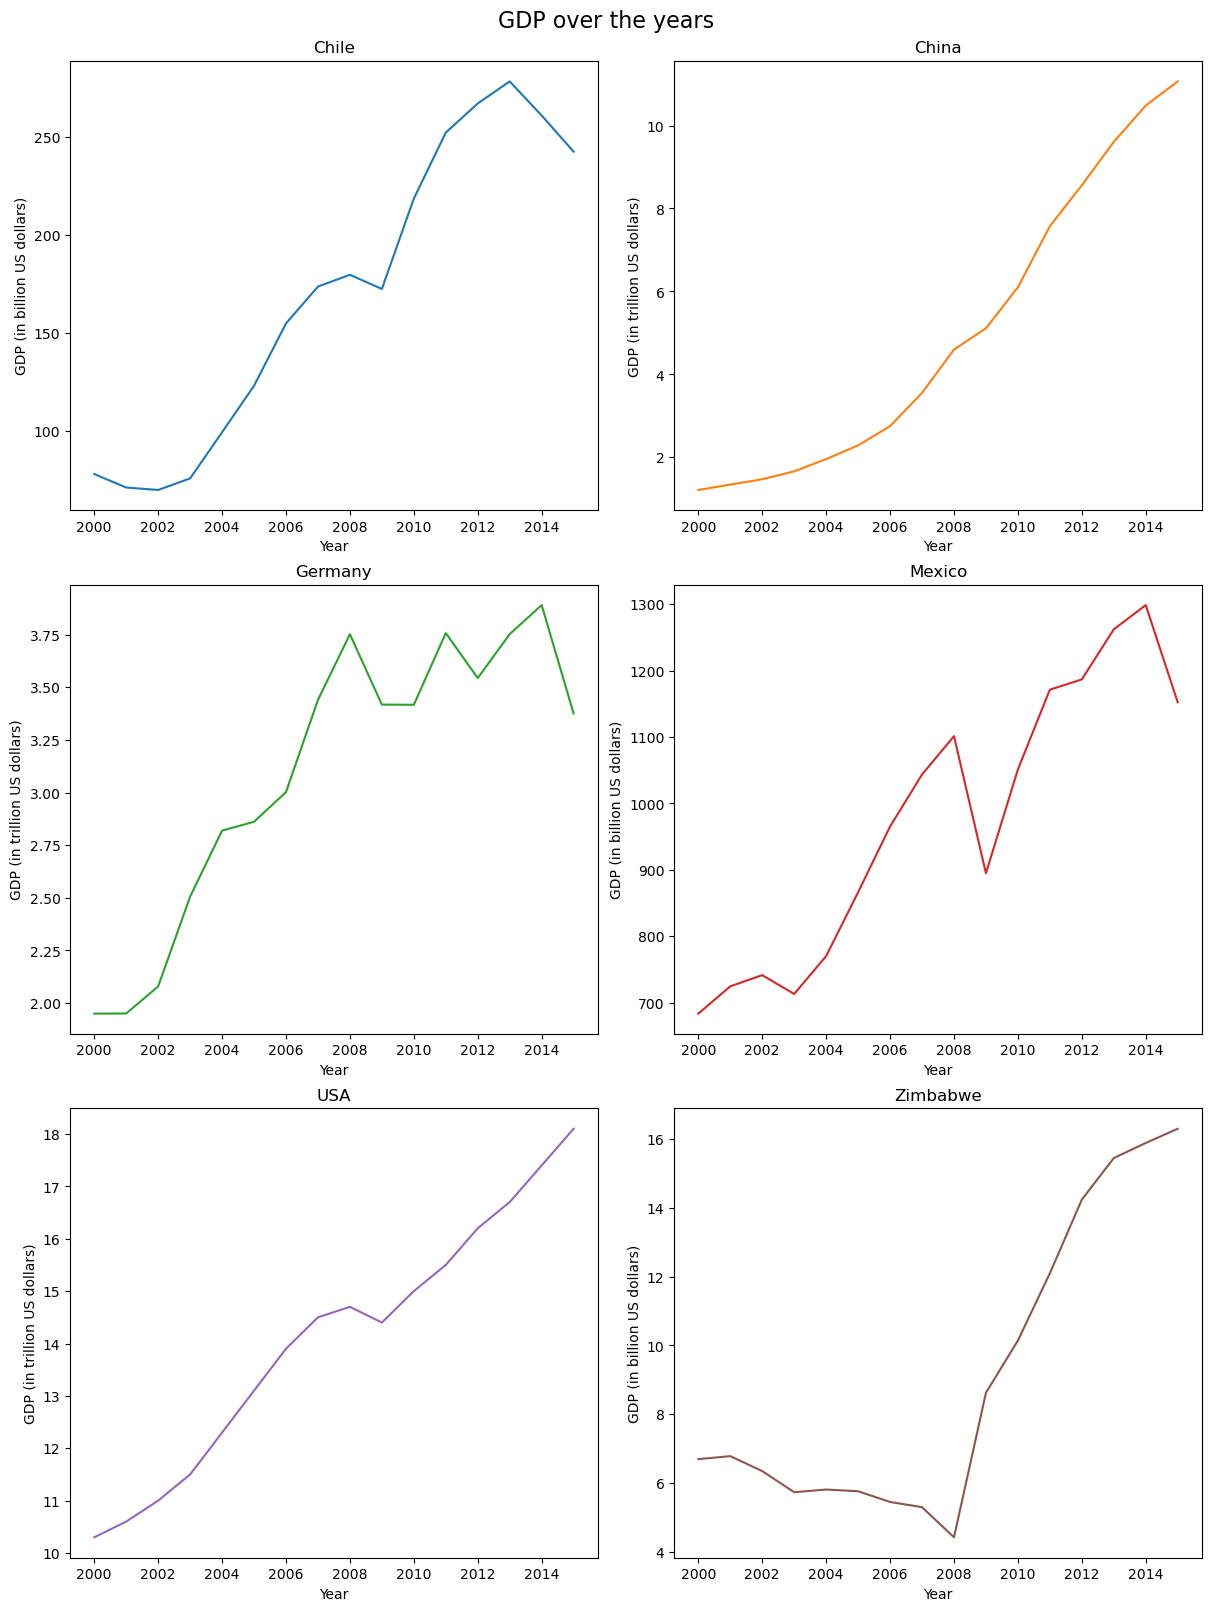

<Figure size 640x480 with 0 Axes>

In [32]:
fig1=plt.figure(figsize=(12, 16), constrained_layout=True)
fig1.suptitle('GDP over the years', fontsize=16)
ax1=plt.subplot(3, 2, 1)
plt.plot(df.Year[df.Country=='Chile'], df.GDP[df.Country=='Chile']/1e9, color='C0')
plt.title('Chile')
plt.xlabel('Year')
plt.ylabel('GDP (in billion US dollars)')
ax2=plt.subplot(3, 2, 2)
plt.plot(df.Year[df.Country=='China'], df.GDP[df.Country=='China']/1e12, color='C1')
plt.title('China')
plt.xlabel('Year')
plt.ylabel('GDP (in trillion US dollars)')
ax3=plt.subplot(3, 2, 3)
plt.plot(df.Year[df.Country=='Germany'], df.GDP[df.Country=='Germany']/1e12, color='C2')
plt.title('Germany')
plt.xlabel('Year')
plt.ylabel('GDP (in trillion US dollars)')
ax4=plt.subplot(3, 2, 4)
plt.plot(df.Year[df.Country=='Mexico'], df.GDP[df.Country=='Mexico']/1e9, color='C3')
plt.title('Mexico')
plt.xlabel('Year')
plt.ylabel('GDP (in billion US dollars)')
ax5=plt.subplot(3, 2, 5)
plt.plot(df.Year[df.Country=='United States of America'], df.GDP[df.Country=='United States of America']/1e12, color='C4')
plt.title('USA')
plt.xlabel('Year')
plt.ylabel('GDP (in trillion US dollars)')
ax6=plt.subplot(3, 2, 6)
plt.plot(df.Year[df.Country=='Zimbabwe'], df.GDP[df.Country=='Zimbabwe']/1e9, color='C5')
plt.title('Zimbabwe')
plt.xlabel('Year')
plt.ylabel('GDP (in billion US dollars)')
plt.show()
plt.clf()

* Looking at the figure displaying the GDP of each country, we again notice an eventual growth when we consider the beginning and end of the time period. However, ups and downs are much more common in this case. 
* Many countries saw their GDP shrink around 2008 during the financial crisis. Zimbabwe is a notable exception, going from consecutive GDP decreases to rapid economig growth, starting in 2009. 
* China appears to steadily increase its GDP in what looks like exponential growth.
* It's important that we take into account the differences in the y-axes: some countries' GDP is measured in billions of dollars and others' in trillions.

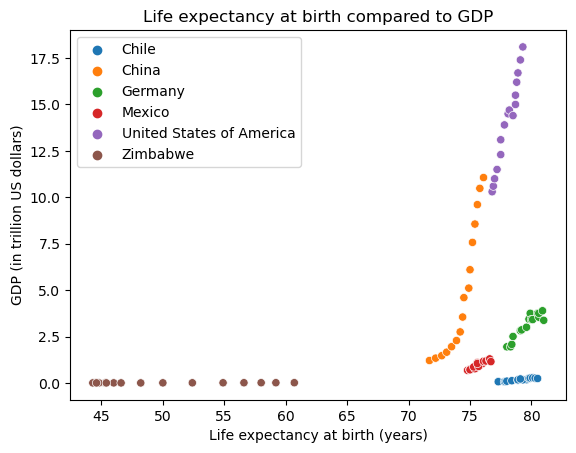

<Figure size 640x480 with 0 Axes>

In [54]:
sns.scatterplot(x='Life expectancy at birth (years)', y=df.GDP/1e12, data=df, hue='Country')
plt.title('Life expectancy at birth compared to GDP')
plt.ylabel('GDP (in trillion US dollars)')
plt.legend()
plt.show()
plt.clf()

* At first glance, it appears there exists a positive relation between a country's GDP and the life expectancy of its inhabitants. However, the kind of relation is not easy to describe. We see countries with vastly different GDPs but comparable life expectancy. 
* The two countries with the lowest GDPs are near the 0 marker of the y-axis since we measure in trillion US dollars, making it difficult to examine any relation. We require a new figure displaying the scatter plot of GDP vs life expectancy for each country separately in order to draw conclusions.

Text(0.5, 1.0, 'Zimbabwe')

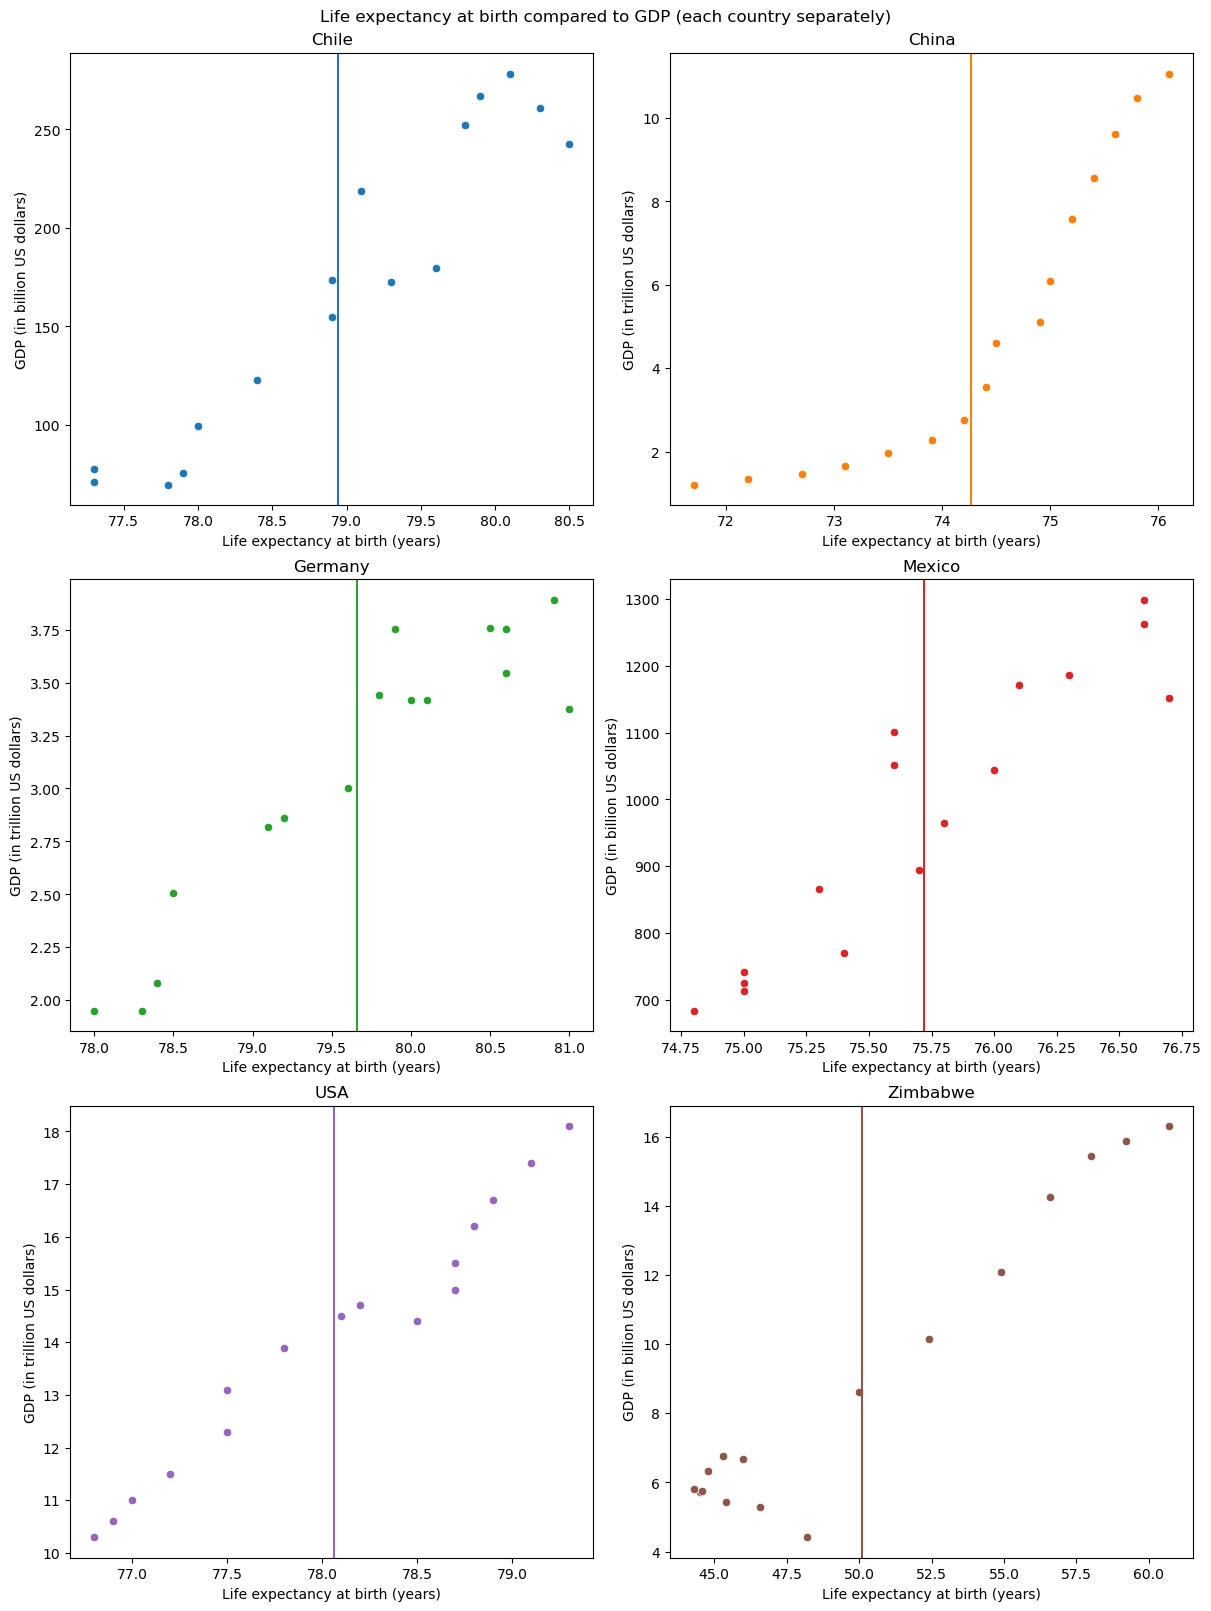

In [57]:
fig2 = plt.figure(figsize=(12, 16), constrained_layout=True)
fig2.suptitle('Life expectancy at birth compared to GDP (each country separately)')
plt.subplot(3, 2, 1)
sns.scatterplot(x='Life expectancy at birth (years)', y=df.GDP/1e9, data=df[df.Country=='Chile'], color='C0')
plt.axvline(life_expectancy_means[0], color='C0')
plt.ylabel('GDP (in billion US dollars)')
plt.title('Chile')
plt.subplot(3, 2, 2)
sns.scatterplot(x='Life expectancy at birth (years)', y=df.GDP/1e12, data=df[df.Country=='China'], color='C1')
plt.axvline(life_expectancy_means[1], color='C1')
plt.ylabel('GDP (in trillion US dollars)')
plt.title('China')
plt.subplot(3, 2, 3)
sns.scatterplot(x='Life expectancy at birth (years)', y=df.GDP/1e12, data=df[df.Country=='Germany'], color='C2')
plt.axvline(life_expectancy_means[2], color='C2')
plt.ylabel('GDP (in trillion US dollars)')
plt.title('Germany')
plt.subplot(3, 2, 4)
sns.scatterplot(x='Life expectancy at birth (years)', y=df.GDP/1e9, data=df[df.Country=='Mexico'], color='C3')
plt.axvline(life_expectancy_means[3], color='C3')
plt.ylabel('GDP (in billion US dollars)')
plt.title('Mexico')
plt.subplot(3, 2, 5)
sns.scatterplot(x='Life expectancy at birth (years)', y=df.GDP/1e12, data=df[df.Country=='United States of America'], color='C4')
plt.axvline(life_expectancy_means[4], color='C4')
plt.ylabel('GDP (in trillion US dollars)')
plt.title('USA')
plt.subplot(3, 2, 6)
sns.scatterplot(x='Life expectancy at birth (years)', y=df.GDP/1e9, data=df[df.Country=='Zimbabwe'], color='C5')
plt.axvline(life_expectancy_means[5], color='C5')
plt.ylabel('GDP (in billion US dollars)')
plt.title('Zimbabwe')

Looking at the six scatter plots separately (the vertical  lines indicate the average life expectancy) , the link between the two metrics is more apparent. In most cases, the relationship between GDP of a country and life expectancy appears to be linear, although the slope of the line varies greatly from country to country. In the case of China, the relation seems to be exponential: for each additional year of life expectancy increase, the GDP roughly doubles.

## Conclusion

* After inspecting the available data, it appears that, for a given country, GDP growth is associated with an increase in life expetancy at birth. However, taking a look at the bigger picture, it's clear that GDP is not a reliable indicator of a country's GDP, and vice versa; countries can have much smaller economies but similar life expectancies. Even in the case of Zimbabwe, which consistently has the lowest life expectancy, the GDP is 3 orders of magnitude less than the US, meaning the difference is not proportional. One must also take into account that both metrics  show an increase throughout the years, meaning that the existence of a third variable influencing both of them is not out of the question.
* These findings were more or less expected: there are factors other than the GDP of a country influencing the life expectancy of its inhabitants. The GDP per capita might be a more reliable indicator, since very populous countries like China that have a big GDP often have a low or medium GDP per capita. The way the economies of the different countries grew is interesting, particularly in the case of Zimbabwe.